<a href="https://colab.research.google.com/github/helya02/HomeWorks/blob/main/ML_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data


In [1]:
import pandas as pd

# Load data
train_df = pd.read_csv('/content/train_credit_data.csv')
test_df = pd.read_csv('/content/test_credit_data.csv')

# Preview the first few rows
print(train_df.head())

# Check shape and info
print("Training set shape:", train_df.shape)
print(train_df.info())

       Income  DebtToIncome  CreditHistory  LatePayments  Employment  \
0  101.692304      6.046014      12.538993             2    3.371397   
1   65.263115     20.920108      16.524981             2    2.558994   
2   83.760685     20.932257       6.834911             0    5.294267   
3   73.293188     16.535676      12.673553             0    1.043815   
4   76.857072     19.444921      10.359301             2    0.000000   

   CreditLines  LoanAmount  HomeOwnership        Age    Savings  Education  \
0            2  223.749888              0  29.654235  63.632573          3   
1            4   39.948799              1  42.493071  61.098483          2   
2            2  206.694898              1  41.379374  82.461972          4   
3            4  120.734710              1  50.546432  80.630408          2   
4            7   97.532696              0  29.366066  39.001485          3   

   ReliabilityScore Risk_Label  
0          4.387126    Average  
1          5.378843    Average  

In [7]:
# Preview the first few rows
print(test_df.head())

# Check shape and info
print("Test set shape:", test_df.shape)
print(test_df.info())

       Income  DebtToIncome  CreditHistory  LatePayments  Employment  \
0  102.183288     29.251776      14.358476             0    2.355237   
1   76.504862     17.439537       7.218960             0    7.199254   
2   92.705715     17.316174      19.552619             1    3.220039   
3   50.969852     14.505600       8.192735             2    0.382309   
4   96.030852     28.202591       2.626863             0    7.759396   

   CreditLines  LoanAmount  HomeOwnership        Age    Savings  Education  \
0            3   92.175948              0  42.496307  45.159063          5   
1            4  127.736658              0  48.002023  54.639346          2   
2            5  193.682271              1  34.117933  57.592317          3   
3            3  146.931570              1  29.422537  41.860780          3   
4            3   43.495935              1  31.638967  50.984073          5   

   ReliabilityScore Risk_Label  
0         13.880731       Poor  
1          6.736591    Average  

In [2]:
print("Missing values in training set:\n", train_df.isnull().sum())

Missing values in training set:
 Income              0
DebtToIncome        0
CreditHistory       0
LatePayments        0
Employment          0
CreditLines         0
LoanAmount          0
HomeOwnership       0
Age                 0
Savings             0
Education           0
ReliabilityScore    0
Risk_Label          0
dtype: int64


In [8]:
print("Missing values in test set:\n", test_df.isnull().sum())

Missing values in test set:
 Income              0
DebtToIncome        0
CreditHistory       0
LatePayments        0
Employment          0
CreditLines         0
LoanAmount          0
HomeOwnership       0
Age                 0
Savings             0
Education           0
ReliabilityScore    0
Risk_Label          0
dtype: int64


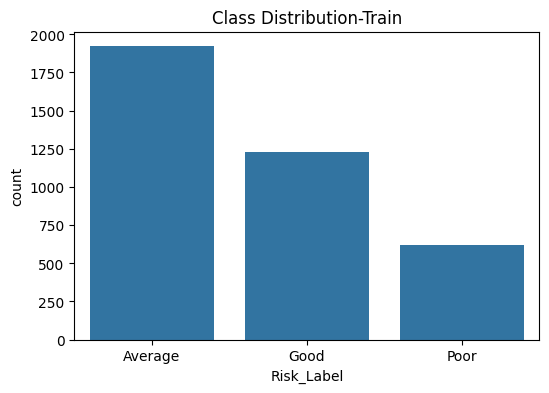

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=train_df, x='Risk_Label')
plt.title('Class Distribution-Train')
plt.show()

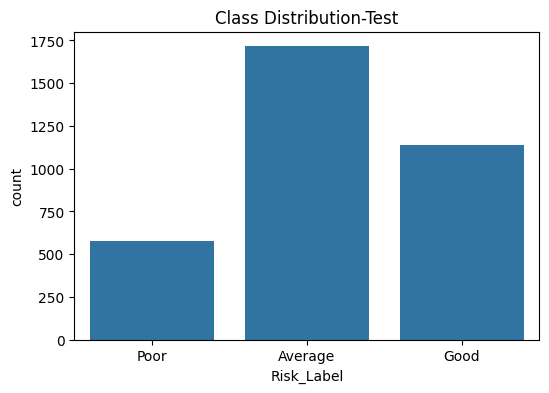

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=test_df, x='Risk_Label')
plt.title('Class Distribution-Test')
plt.show()

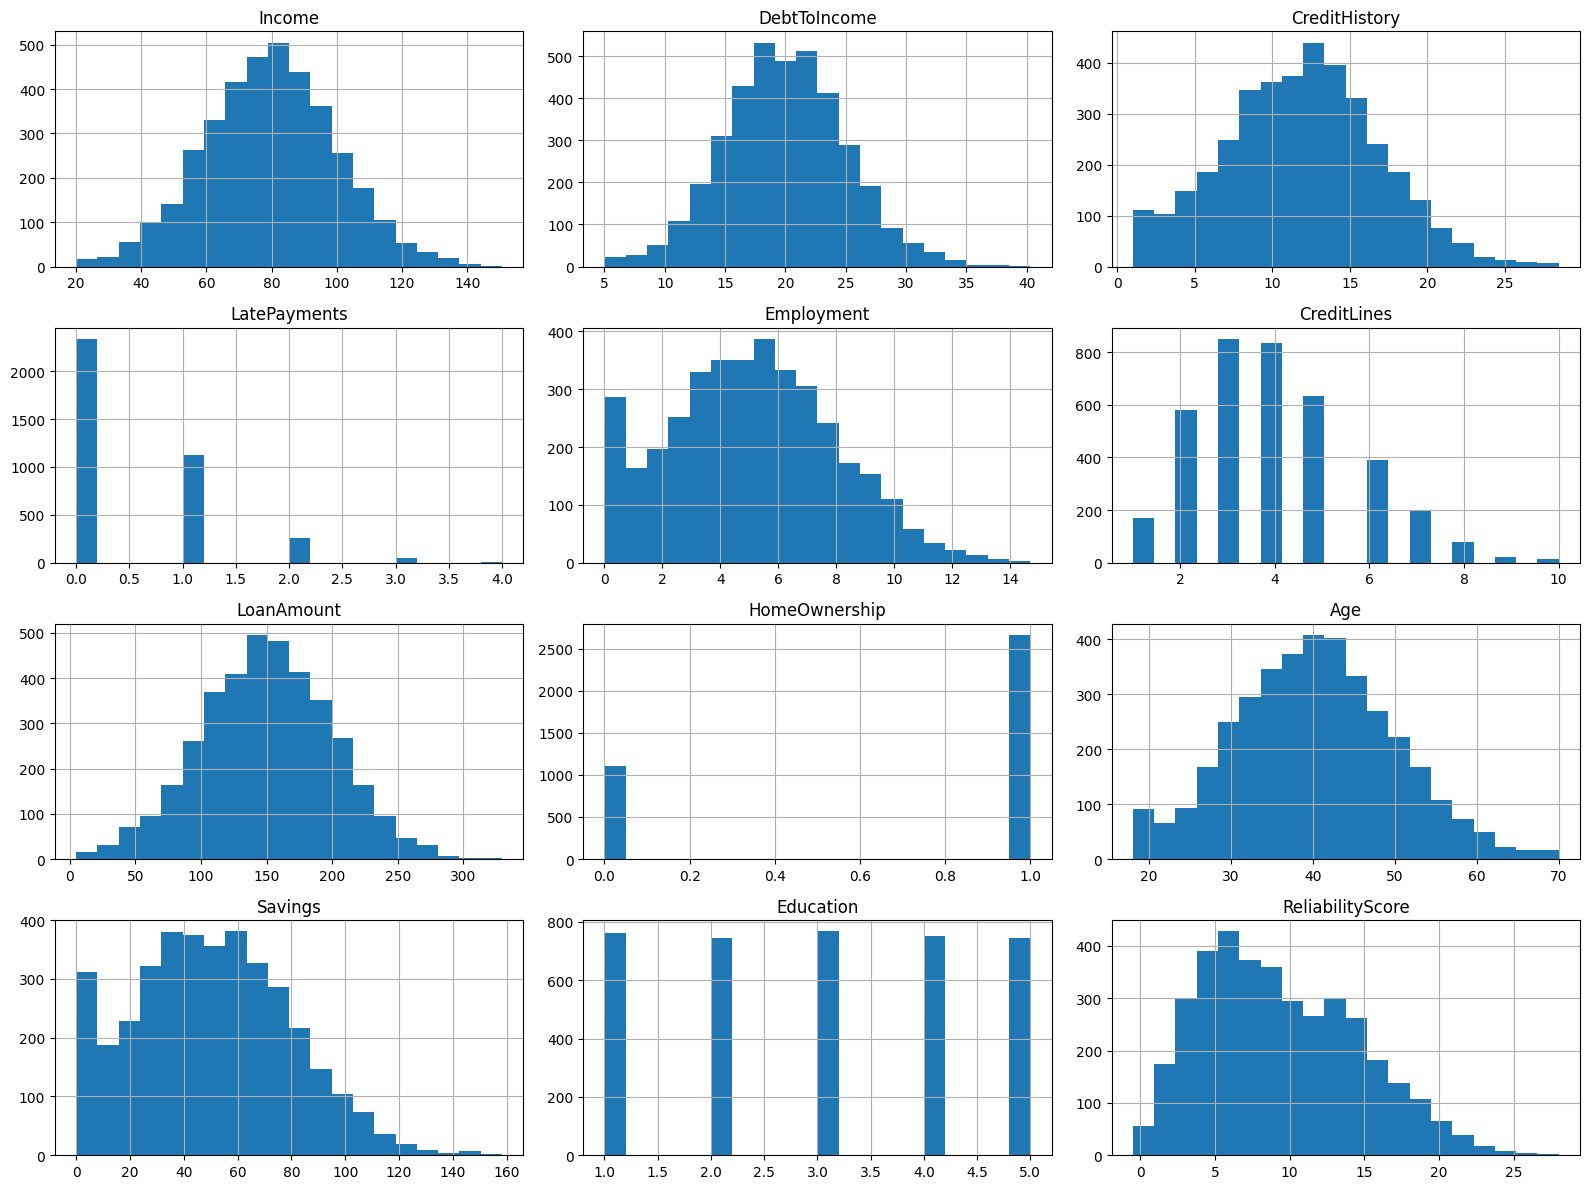

In [11]:
features = ['Income', 'DebtToIncome', 'CreditHistory', 'LatePayments', 'Employment',
            'CreditLines', 'LoanAmount', 'HomeOwnership', 'Age', 'Savings', 'Education', 'ReliabilityScore']

# Histograms
train_df[features].hist(bins=20, figsize=(16,12))
plt.tight_layout()
plt.show()

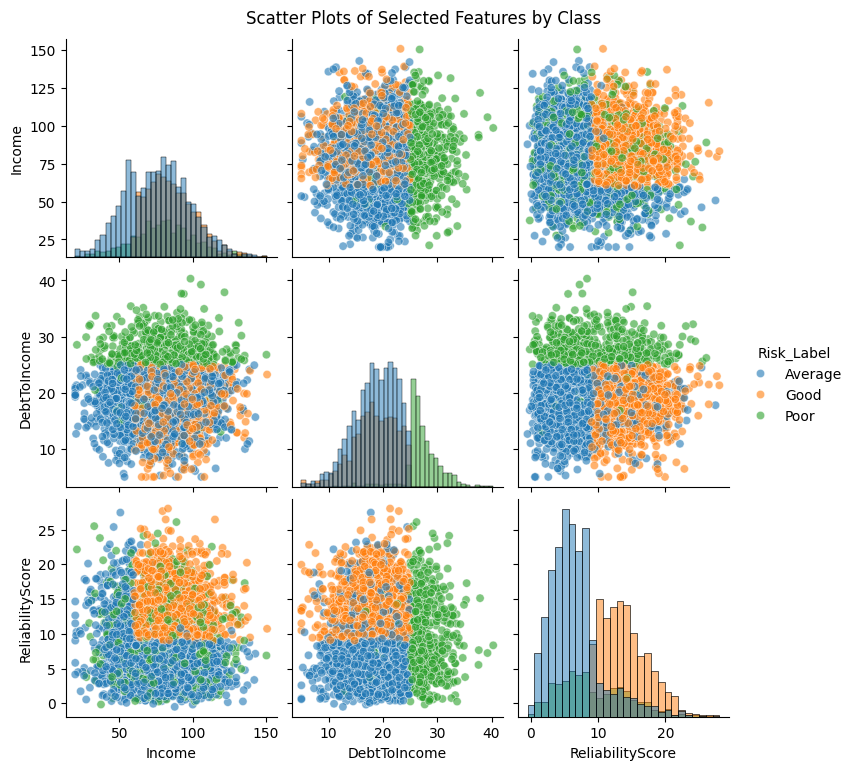

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pick a subset of features to make it readable (you can rotate features)
selected_features = ['Income', 'DebtToIncome', 'ReliabilityScore', 'Risk_Label']

# Create pairplot
sns.pairplot(train_df[selected_features], hue='Risk_Label', diag_kind='hist', plot_kws={'alpha': 0.6})
plt.suptitle('Scatter Plots of Selected Features by Class', y=1.02)
plt.show()

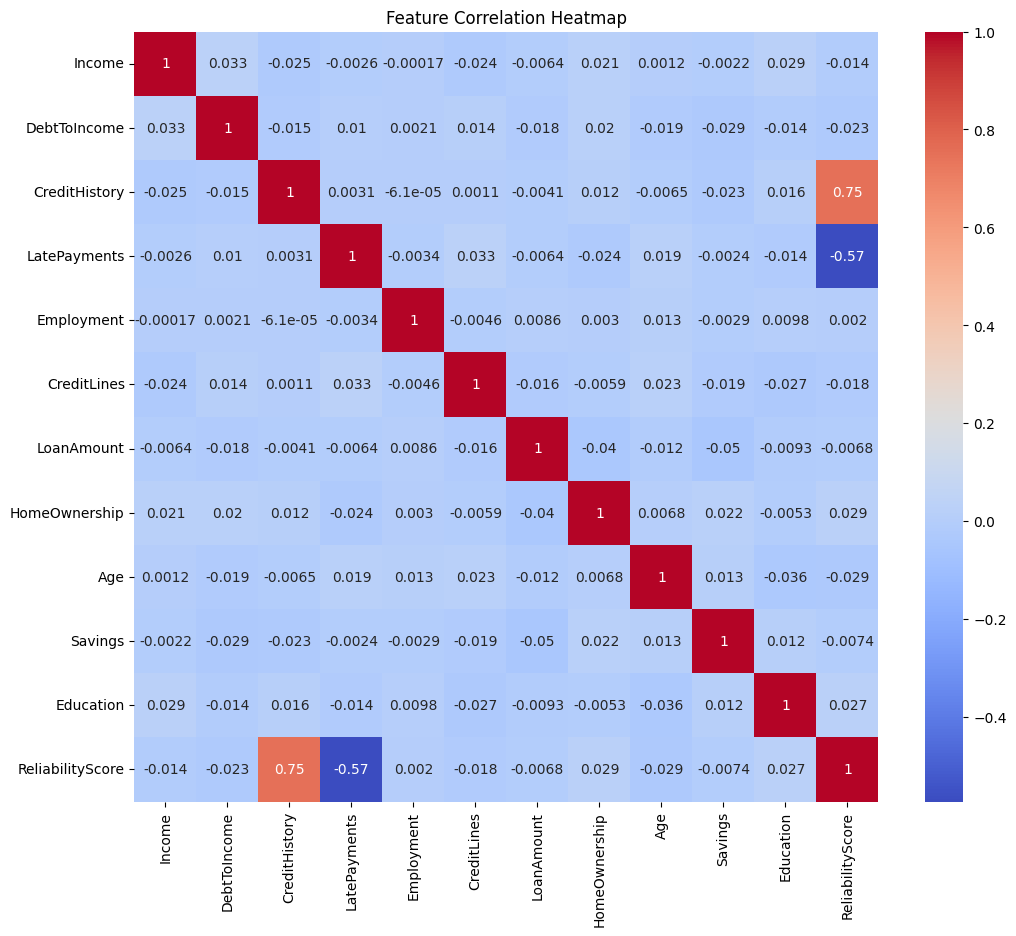

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(train_df[features].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

With Library

In [20]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:

train_df = pd.read_csv('/content/train_credit_data.csv')
test_df = pd.read_csv('/content/test_credit_data.csv')


X_train = train_df.drop(columns=['Risk_Label'])
y_train = train_df['Risk_Label']

X_test = test_df.drop(columns=['Risk_Label'])
y_test = test_df['Risk_Label']

In [22]:

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
best_tree = grid.best_estimator_

Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}


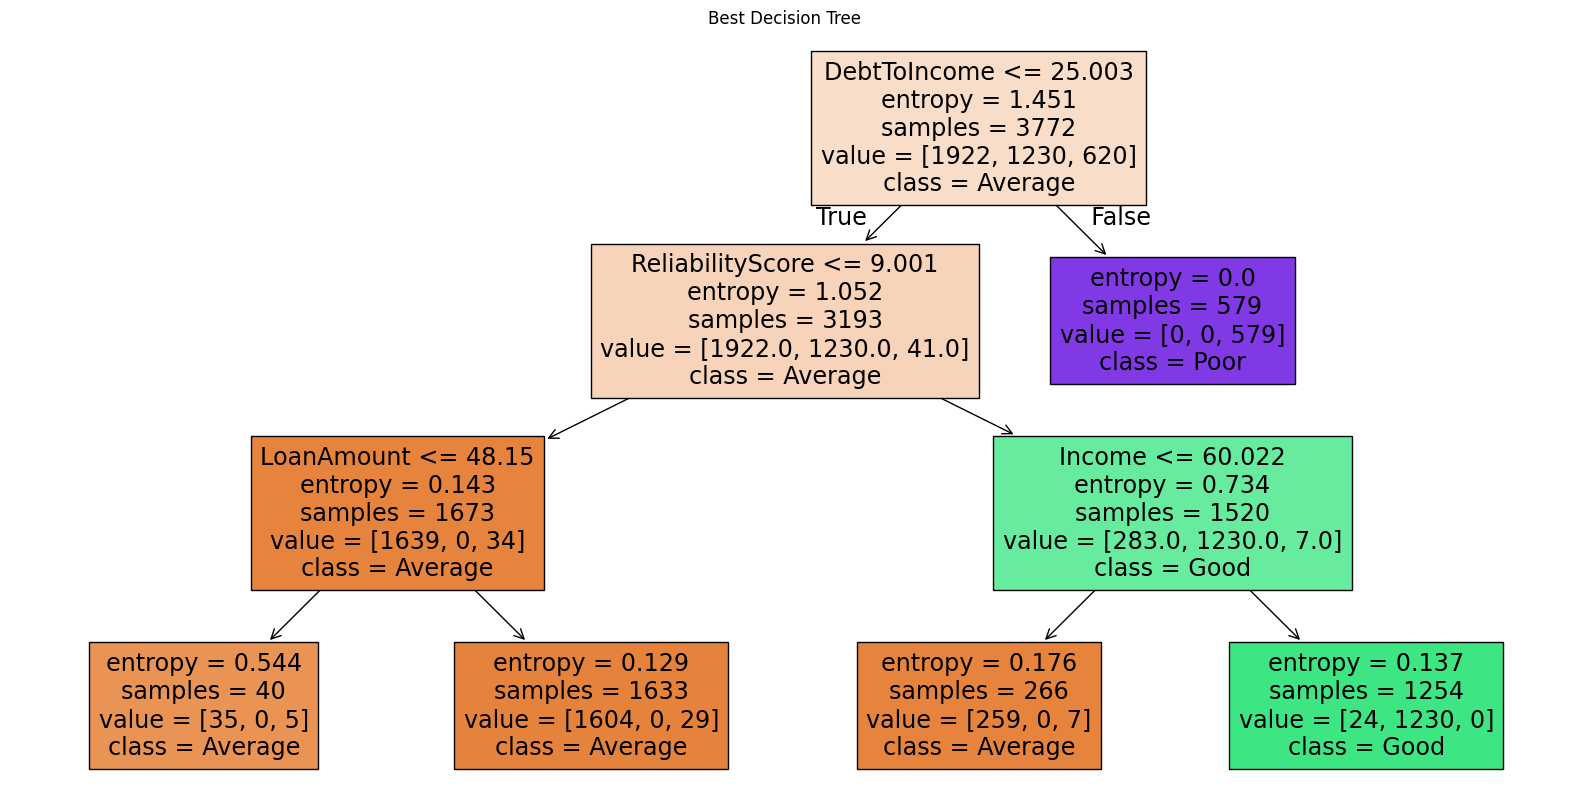

In [23]:
plt.figure(figsize=(20,10))
plot_tree(best_tree, feature_names=X_train.columns, class_names=best_tree.classes_, filled=True)
plt.title("Best Decision Tree")
plt.show()

Classification Report (Train Set):
               precision    recall  f1-score   support

     Average       0.98      0.99      0.98      1922
        Good       0.98      1.00      0.99      1230
        Poor       1.00      0.93      0.97       620

    accuracy                           0.98      3772
   macro avg       0.99      0.97      0.98      3772
weighted avg       0.98      0.98      0.98      3772



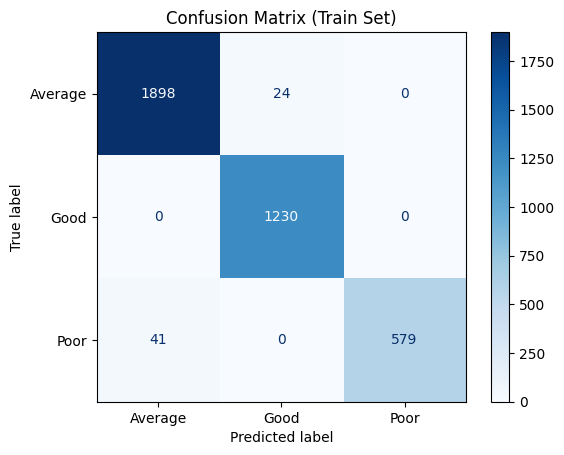

Classification Report (Test Set):
               precision    recall  f1-score   support

     Average       0.98      0.98      0.98      1716
        Good       0.97      1.00      0.98      1137
        Poor       1.00      0.93      0.96       575

    accuracy                           0.98      3428
   macro avg       0.98      0.97      0.98      3428
weighted avg       0.98      0.98      0.98      3428



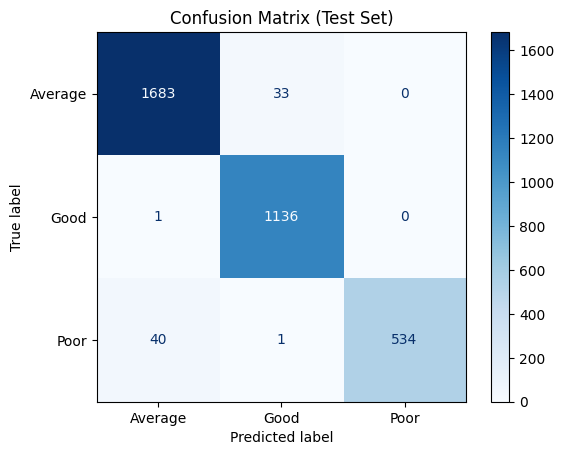

In [24]:
def evaluate_model(model, X, y, title=''):
    y_pred = model.predict(X)
    print(f"Classification Report ({title}):\n", classification_report(y, y_pred))
    cm = confusion_matrix(y, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix ({title})')
    plt.show()

evaluate_model(best_tree, X_train, y_train, 'Train Set')
evaluate_model(best_tree, X_test, y_test, 'Test Set')

Classification Report (Unpruned - Train):
               precision    recall  f1-score   support

     Average       1.00      1.00      1.00      1922
        Good       1.00      1.00      1.00      1230
        Poor       1.00      1.00      1.00       620

    accuracy                           1.00      3772
   macro avg       1.00      1.00      1.00      3772
weighted avg       1.00      1.00      1.00      3772



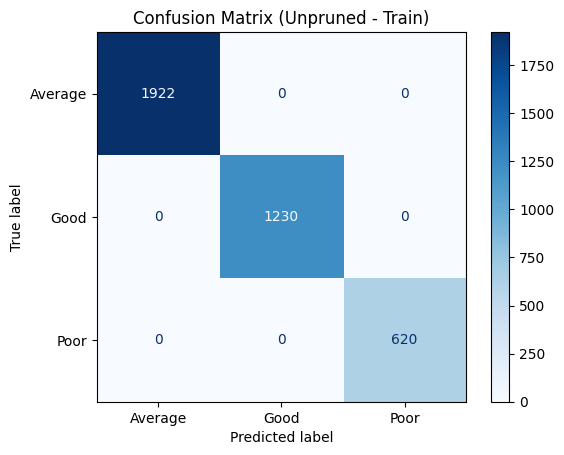

Classification Report (Unpruned - Test):
               precision    recall  f1-score   support

     Average       0.96      0.96      0.96      1716
        Good       0.97      0.98      0.98      1137
        Poor       0.93      0.93      0.93       575

    accuracy                           0.96      3428
   macro avg       0.96      0.96      0.96      3428
weighted avg       0.96      0.96      0.96      3428



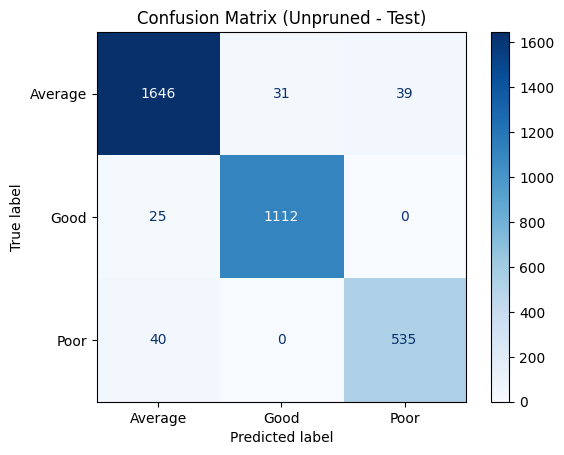

In [25]:
# No pre-pruning tree (overfitted)
unpruned_tree = DecisionTreeClassifier()
unpruned_tree.fit(X_train, y_train)

evaluate_model(unpruned_tree, X_train, y_train, 'Unpruned - Train')
evaluate_model(unpruned_tree, X_test, y_test, 'Unpruned - Test')

Classification Report (Normalized - Train):
               precision    recall  f1-score   support

     Average       0.98      0.99      0.98      1922
        Good       0.98      1.00      0.99      1230
        Poor       1.00      0.93      0.97       620

    accuracy                           0.98      3772
   macro avg       0.99      0.97      0.98      3772
weighted avg       0.98      0.98      0.98      3772



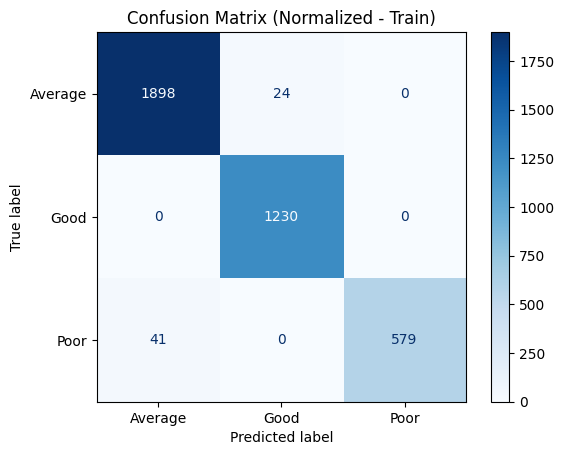

Classification Report (Normalized - Test):
               precision    recall  f1-score   support

     Average       0.98      0.98      0.98      1716
        Good       0.97      1.00      0.98      1137
        Poor       1.00      0.93      0.96       575

    accuracy                           0.98      3428
   macro avg       0.98      0.97      0.98      3428
weighted avg       0.98      0.98      0.98      3428



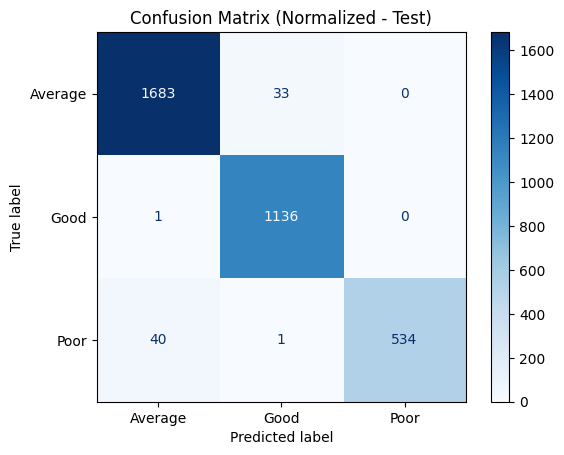

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

norm_tree = DecisionTreeClassifier(**grid.best_params_)
norm_tree.fit(X_train_scaled, y_train)

evaluate_model(norm_tree, X_train_scaled, y_train, 'Normalized - Train')
evaluate_model(norm_tree, X_test_scaled, y_test, 'Normalized - Test')

<ipython-input-27-ae6a4aa568fe>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = train_df.groupby('Risk_Label').apply(lambda x: x.sample(min_class_size)).reset_index(drop=True)


Classification Report (Balanced - Train):
               precision    recall  f1-score   support

     Average       0.94      0.98      0.96       620
        Good       0.98      1.00      0.99       620
        Poor       1.00      0.93      0.97       620

    accuracy                           0.97      1860
   macro avg       0.97      0.97      0.97      1860
weighted avg       0.97      0.97      0.97      1860



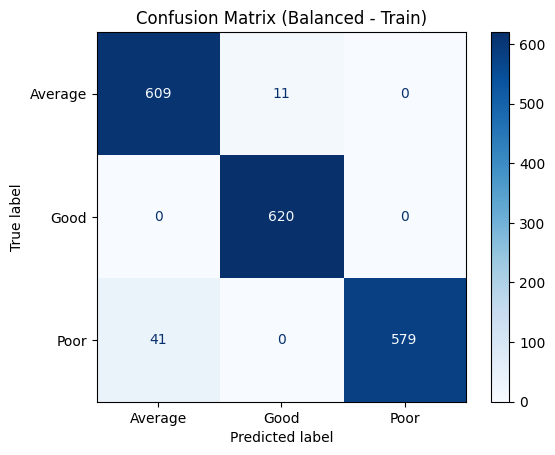

Classification Report (Balanced - Test):
               precision    recall  f1-score   support

     Average       0.98      0.98      0.98      1716
        Good       0.97      1.00      0.98      1137
        Poor       1.00      0.93      0.96       575

    accuracy                           0.98      3428
   macro avg       0.98      0.97      0.97      3428
weighted avg       0.98      0.98      0.98      3428



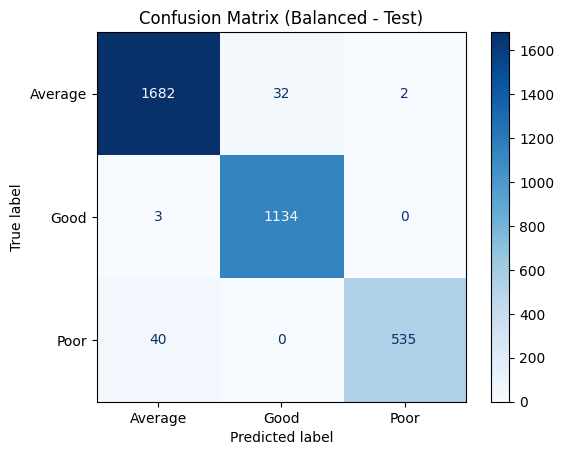

In [27]:
# Balance training set
min_class_size = y_train.value_counts().min()
balanced_df = train_df.groupby('Risk_Label').apply(lambda x: x.sample(min_class_size)).reset_index(drop=True)

X_bal = balanced_df.drop(columns=['Risk_Label'])
y_bal = balanced_df['Risk_Label']

# Train on balanced data
balanced_tree = DecisionTreeClassifier(**grid.best_params_)
balanced_tree.fit(X_bal, y_bal)

evaluate_model(balanced_tree, X_bal, y_bal, 'Balanced - Train')
evaluate_model(balanced_tree, X_test, y_test, 'Balanced - Test')